In [18]:
import astropy.units as u
from specutils import Spectrum1D
from astrodb_utils.spectra import check_spectrum_plottable
from specutils import Spectrum, SpectralRegion
from specutils import Spectrum
from specutils.manipulation import snr_threshold
from astropy.nddata import StdDevUncertainty
import astropy.units as u
from astrodb_utils.spectra import check_spectrum_plottable
from specutils.manipulation import extract_region
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file_fire = "/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/FIRE_1013m7246.txt"

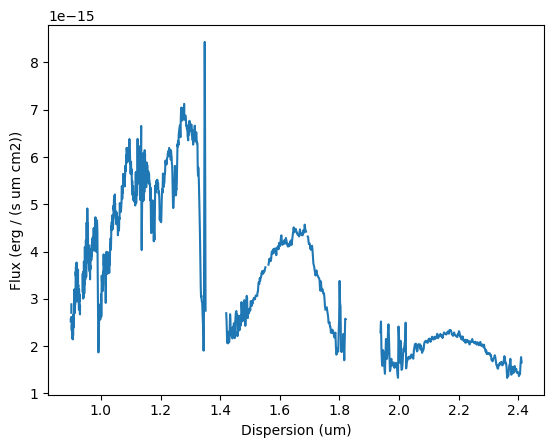

now extract region method


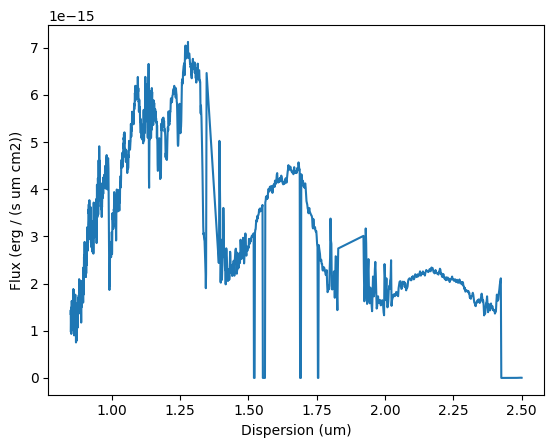

/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/FIRE_1013m7246.txt is plottable



In [16]:
file_fire = "/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/FIRE_1013m7246.txt"
data = np.loadtxt(file_fire, comments="#")

wavelength = data[:, 0] * u.um
flux = data[:, 1] * (u.erg / u.cm**2 / u.s / u.um)
uncertainty_array = data[:, 2] * (u.erg / u.cm**2 / u.s / u.um)

# Create Spectrum object with uncertainty
spectrum = Spectrum(
    flux=flux,
    spectral_axis=wavelength,
    uncertainty=StdDevUncertainty(uncertainty_array)
)
extract_spectrum = extract_region(spectrum, SpectralRegion([(0.85*u.um, 1.348*u.um),(1.39*u.um, 1.83*u.um),(1.92*u.um, 2.5*u.um)]), return_single_spectrum=True)

# apply masking
snr_limit = 15
spectrum_masked = snr_threshold(spectrum, snr_limit)

# Optionally replace masked points with NaN
masked_flux = spectrum_masked.flux.copy()
masked_flux[spectrum_masked.mask] = np.nan
spectrum_masked = Spectrum(
    flux=masked_flux,
    spectral_axis=wavelength,
    uncertainty=StdDevUncertainty(uncertainty_array)
)

# Plot masked spectrum
if check_spectrum_plottable(spectrum_masked, show_plot=True):
    print("now extract region method") # try to compare msking and extract region
    check_spectrum_plottable(extract_spectrum, show_plot=True)
    print(f"{file_fire} is plottable\n")


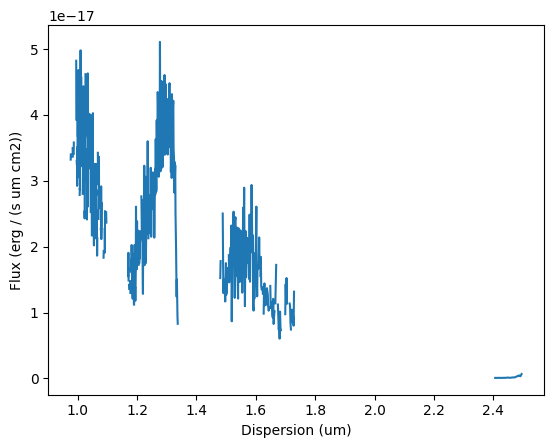

now use extract region method:


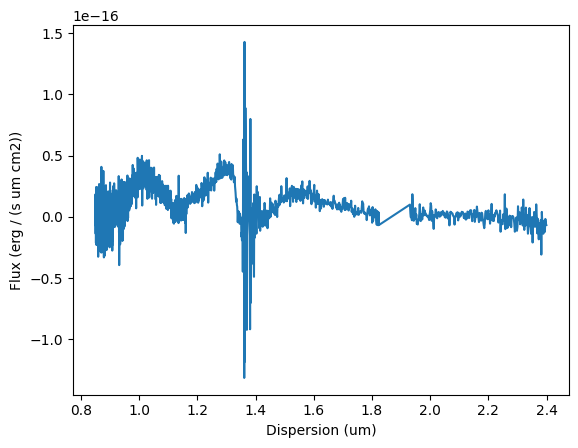

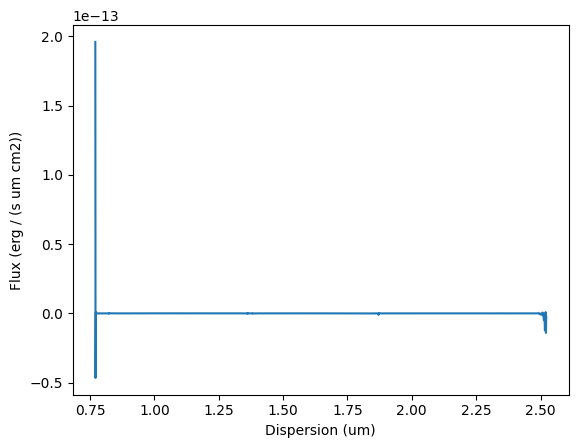

/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/fireprism_NIR_J0414-5854.csv is plottable



In [82]:
from specutils import Spectrum
from specutils.manipulation import snr_threshold
from astropy.nddata import StdDevUncertainty
import astropy.units as u
from astrodb_utils.spectra import check_spectrum_plottable

file_fire ="/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/fireprism_NIR_J0414-5854.csv"
data = np.genfromtxt(file_fire, delimiter=",", skip_header=1)
#WISEA J041451.67−585456.7

wavelength = data[:, 0] * u.um
flux = data[:, 1] * (u.erg / u.cm**2 / u.s / u.um)
uncertainty_array = data[:, 2] * (u.erg / u.cm**2 / u.s / u.um)

# Create Spectrum object with uncertainty
spectrum = Spectrum(
    flux=flux,
    spectral_axis=wavelength,
    uncertainty=StdDevUncertainty(uncertainty_array)
)
extract_spectrum =extract_region(spectrum, SpectralRegion([(0.85*u.um, 1.374*u.um),(1.38*u.um, 1.825*u.um),(1.93*u.um, 2.4*u.um)]), return_single_spectrum=True)

# apply masking
snr_limit = 3
spectrum_masked = snr_threshold(spectrum, snr_limit)

# # Optionally replace masked points with NaN
masked_flux = spectrum_masked.flux.copy()
masked_flux[spectrum_masked.mask] = np.nan
spectrum_masked = Spectrum(
    flux=masked_flux,
    spectral_axis=wavelength,
    uncertainty=StdDevUncertainty(uncertainty_array)
)

# Plot masked spectrum
if check_spectrum_plottable(spectrum_masked, show_plot=True):
    print("now use extract region method:") # try to compare msking and extract region
    check_spectrum_plottable(extract_spectrum, show_plot=True)
    check_spectrum_plottable(spectrum, show_plot=True)
    print(f"{file_fire} is plottable\n")



Reading /Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/fireprism_NIR_ULASJ124947.04+095019.8.txt


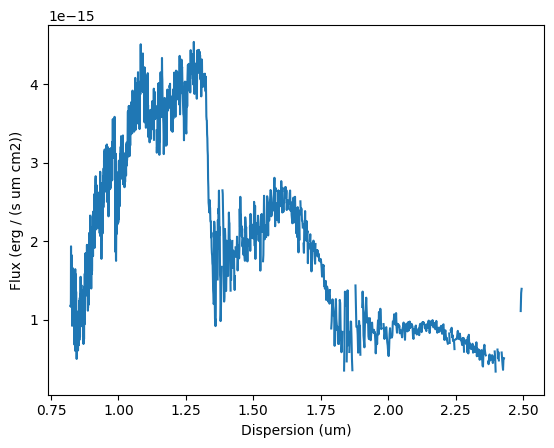

now use extract region method:


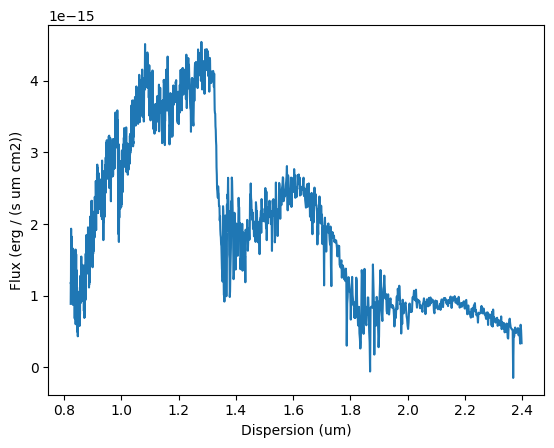

/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/fireprism_NIR_J0414-5854.csv is plottable

Reading /Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/fireprism_NIR_ULASJ133836.97-022910.7.txt


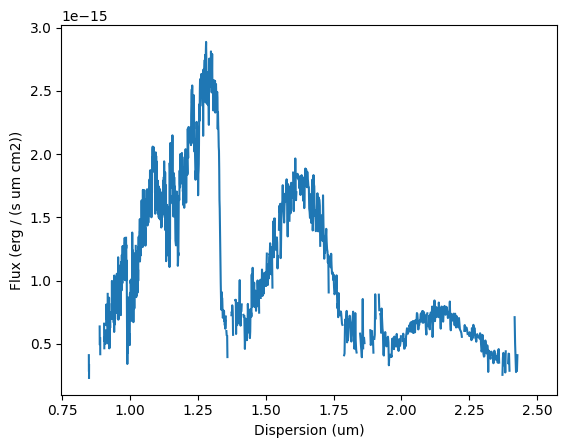

now use extract region method:


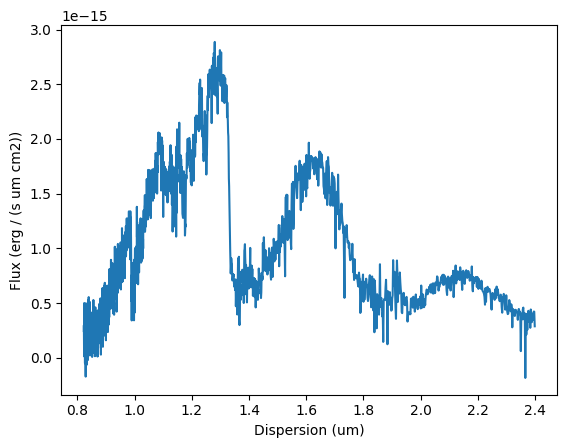

/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/fireprism_NIR_J0414-5854.csv is plottable



In [65]:
# Handle Fire prism with txt file
"""  Process source with DSpec spectra
Read the data on 3 columns:
#1: wavelength      #2: flux        #3: uncertainty
"""
files = ["/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/fireprism_NIR_ULASJ124947.04+095019.8.txt",
         "/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/fireprism_NIR_ULASJ133836.97-022910.7.txt"]
for file in files:
    print(f"Reading {file}")
    data = np.loadtxt(file, comments="#", skiprows=12)

    wavelength = data[:, 0] * u.um
    flux = data[:, 1] * (u.erg / u.cm**2 / u.s / u.um)
    uncertainty_array = data[:, 2] * (u.erg / u.cm**2 / u.s / u.um)


    # Create a spectrum object
    spectrum = Spectrum(flux=flux, spectral_axis=wavelength)
    # spectrum = extract_region(spectrum, SpectralRegion(0*u.um, 2.4*u.um))

    # Create Spectrum object with uncertainty
    spectrum = Spectrum(
        flux=flux,
        spectral_axis=wavelength,
        uncertainty=StdDevUncertainty(uncertainty_array)
    )
    extract_spectrum =extract_region(spectrum, SpectralRegion(0*u.um, 2.4*u.um))

    # apply masking
    snr_limit = 2
    spectrum_masked = snr_threshold(spectrum, snr_limit)

    # # Optionally replace masked points with NaN
    masked_flux = spectrum_masked.flux.copy()
    masked_flux[spectrum_masked.mask] = np.nan
    spectrum_masked = Spectrum(
        flux=masked_flux,
        spectral_axis=wavelength,
        uncertainty=StdDevUncertainty(uncertainty_array)
    )

    # Plot masked spectrum
    if check_spectrum_plottable(spectrum_masked, show_plot=True):
        print("now use extract region method:") # try to compare msking and extract region
        check_spectrum_plottable(extract_spectrum, show_plot=True)
        print(f"{file_fire} is plottable\n")